<a href="https://colab.research.google.com/github/YacineBel91/titanic_AI/blob/main/AIcourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!!!!!!!!! Always execute this tab and never remove it, it mounts our Google Drive as the disk we use, we will always keep the files in the shared section of our GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

In [ ]:
titanic_test = pd.read_csv ('/content/drive/Shared drives/AI/test.csv', index_col="PassengerId")
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
titanic_train = pd.read_csv ('/content/drive/Shared drives/AI/train.csv',index_col="PassengerId")
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
def encodeSex(x):
    if x=="male":
        return 0
    if x=="female":
        return 1
titanic_train['SexCode'] = titanic_train['Sex'].apply(encodeSex)
titanic_test['SexCode'] = titanic_test['Sex'].apply(encodeSex)

In [ ]:
def fillage(train_df):
    for i in range(0,2):
        for j in range(1,4):
            guessedAge = train_df[(train_df['SexCode'] == i) &(train_df['Pclass'] == j)]['Age'].dropna()
            guessedAge= guessedAge.median()
        
            train_df.loc[ (train_df.Age.isnull()) & (train_df.SexCode == i) & (train_df.Pclass == j),\
                    'Age'] = guessedAge
    return train_df

In [ ]:
titanic_train = fillage(titanic_train)
titanic_test = fillage(titanic_test)

In [ ]:
titanic_train.isna().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
SexCode       0
dtype: int64

In [ ]:
#Linear Discriminant Analysis
# Selecting the Data that would be relevant for the prediction 

LDA_data_train = titanic_train[["Survived","SexCode" ,"Pclass", "Age", "Fare"]]
x_train = pd.DataFrame(data=LDA_data_train, columns=
                 ["SexCode" ,"Pclass", "Age", "Fare"])
y_train = pd.DataFrame(data=LDA_data_train, columns=
                 ["Survived"])

LDA_data_test = titanic_test[["SexCode" ,"Pclass", "Age", "Fare"]]
LDA_data_test.Fare.fillna(LDA_data_test.Fare.mean(), inplace = True)

x_test = pd.DataFrame(data=LDA_data_test, columns=
                 ["SexCode" ,"Pclass", "Age", "Fare"])
y_test = []


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# Preprocessing: Data featuring using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train.values.ravel())
x_test = lda.transform(x_test)


classifier = LinearDiscriminantAnalysis()

classifier.fit(x_train, y_train.values.ravel())
y_test = classifier.predict(x_test)





In [ ]:

acc_lda = round(classifier.score(x_train, y_train) * 100, 2)
acc_lda

79.12

In [ ]:
submission = pd.read_csv('/content/drive/Shared drives/AI/gender_submission.csv')
submission.Survived.fillna(0, inplace= True)

y_result = submission['Survived']

In [ ]:
from sklearn.metrics import accuracy_score
accu_score = round(accuracy_score(y_test, y_result) * 100,2)
print(f'Accuracy of LDA is : {accu_score}')


Accuracy of LDA is : 98.09


For k = 1, prediction accuracy is 0.7511961722488039 and training score is 0.98
For k = 3, prediction accuracy is 0.7990430622009569 and training score is 0.89
For k = 5, prediction accuracy is 0.8444976076555024 and training score is 0.86
For k = 7, prediction accuracy is 0.8660287081339713 and training score is 0.84
For k = 9, prediction accuracy is 0.8995215311004785 and training score is 0.84
For k = 11, prediction accuracy is 0.8755980861244019 and training score is 0.83
For k = 13, prediction accuracy is 0.8899521531100478 and training score is 0.83
For k = 15, prediction accuracy is 0.9090909090909091 and training score is 0.83
For k = 17, prediction accuracy is 0.937799043062201 and training score is 0.83
For k = 19, prediction accuracy is 0.930622009569378 and training score is 0.82
For k = 21, prediction accuracy is 0.9282296650717703 and training score is 0.81
For k = 23, prediction accuracy is 0.930622009569378 and training score is 0.81
For k = 25, prediction accuracy is 0

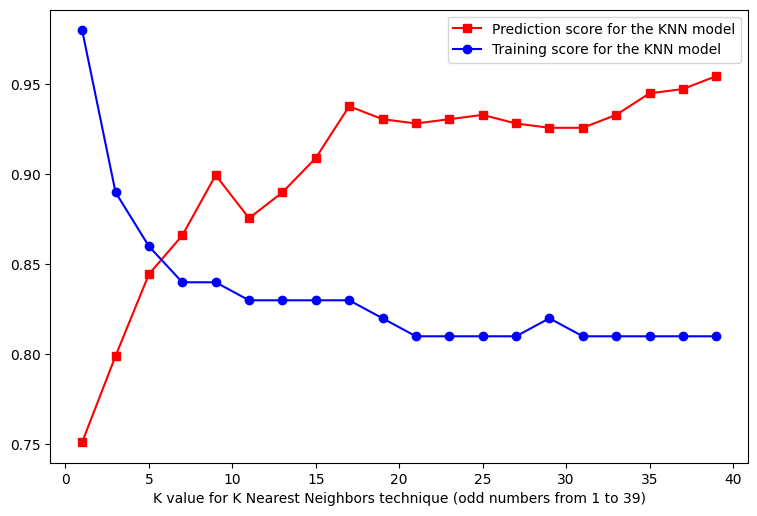

In [ ]:
###------Method using MinMaxScaler

plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

completeTrainDataSet = pd.DataFrame(data=titanic_train, columns=["SexCode", "Pclass", "Age", "SibSp", "Parch", "Fare", "Survived"])

completeTrainDataSet.Age.fillna(completeTrainDataSet.Age.mean(), inplace=True)

scaler = MinMaxScaler()#scaler has a method that returns normalized values (makes them range from 0 to 1) The goal is to scale data to avoid scale-related bias

trainX = pd.DataFrame(data=completeTrainDataSet, columns=["SexCode", "Pclass", "Age", "SibSp", "Parch", "Fare"])#Features
trainY = pd.DataFrame(data=completeTrainDataSet, columns=["Survived"])#Target class

testX = pd.DataFrame(data=titanic_test, columns=["SexCode", "Pclass", "Age", "SibSp", "Parch", "Fare"])#testX will be used to test our model (make predictions)

testX.Fare.fillna(testX.Fare.mean(), inplace=True)#Remove NAs by replacing them with the mean
testX.Age.fillna(testX.Age.mean(), inplace=True)#Remove NAs by replacing them with the mean

trainX = scaler.fit_transform(trainX)#Use the same scaler to scale both train and test data sets
testX = scaler.fit_transform(testX)

#submission = pd.read_csv('gender_submission.csv')#Read once and for all the solution (so we don't have to load it everytime)
testY = submission.Survived

x = np.zeros(20)#We will plot data about 20 different values of K
y = np.zeros(20)
z = np.zeros(20)

for i, k in enumerate(range(1, 40, 2)):
    model = KNeighborsClassifier(n_neighbors=k)#i is the index, we test several values of k and save the accuracy of the prediction given k
    model.fit(trainX, trainY.values.ravel())
    predictedY = model.predict(testX)
    x[i] = k#given k
    y[i] = accuracy_score(testY, predictedY)#How is the prediction
    z[i] = round(model.score(trainX, trainY), 2)#How is the training score
    print(f"For k = {k}, prediction accuracy is {y[i]} and training score is {z[i]}")

plt.plot(x, y, "rs-", label="Prediction score for the KNN model")
plt.plot(x, z, "bo-", label="Training score for the KNN model")
plt.legend()
plt.xlabel("K value for K Nearest Neighbors technique (odd numbers from 1 to 39)")
plt.show()

In [ ]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
train_df = titanic_train.drop(['Name', "Cabin","Ticket","Sex","SibSp","Parch"], axis=1)
test_df = titanic_test.drop(['Name', "Cabin","Ticket","Sex","SibSp","Parch"], axis=1)

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)

In [ ]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

In [ ]:
test_df.Fare.fillna(test_df.Fare.mean(), inplace = True)
test_df.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

In [ ]:
train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age']
train_df['Age'] = train_df['Age'].astype(int)

In [ ]:
test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[ test_df['Age'] > 64, 'Age']
test_df['Age'] = test_df['Age'].astype(int)

In [ ]:
X = train_df.drop(["Survived"], axis=1)
Y = train_df["Survived"]
X.shape, Y.shape
X_test=test_df

In [ ]:
X.isna().sum(axis=0)

Pclass      0
Age         0
Fare        0
Embarked    0
SexCode     0
dtype: int64

In [ ]:
X_test.isna().sum(axis=0)

Pclass      0
Age         0
Fare        0
Embarked    0
SexCode     0
dtype: int64

In [ ]:
X_test

,Pclass,Age,Fare,Embarked,SexCode
PassengerId,,,,,
892,3,2,0,2,0
893,3,2,0,0,1
894,2,3,1,2,0
895,3,1,1,0,0
896,3,1,1,0,1
...,...,...,...,...,...
1305,3,1,1,0,0
1306,1,2,3,1,1
1307,3,2,0,0,0


In [ ]:
xDataTrain, xDataTest, yDataTrain, yDataTest = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
yDataTrain.shape, xDataTrain.shape, xDataTest

((712,), (712, 5),              Pclass  Age  Fare  Embarked  SexCode
 PassengerId                                      
 710               3    1     2         1        0
 440               2    1     1         0        0
 841               3    1     1         0        0
 721               2    0     3         0        1
 40                3    0     1         1        1
 ...             ...  ...   ...       ...      ...
 434               3    1     0         0        0
 774               3    1     0         1        0
 26                3    2     3         0        1
 85                2    1     1         0        1
 11                3    0     2         0        1
 
 [179 rows x 5 columns])

In [ ]:
logreg = LogisticRegression()
logreg.fit(xDataTrain, yDataTrain)
Y_pred = logreg.predict(xDataTest)

In [ ]:
accLogTrain = round(logreg.score(xDataTrain, yDataTrain) * 100, 2)
accLogTrain

78.65

In [ ]:
accLogTest=round(logreg.score(xDataTest, yDataTest) * 100, 2)
accLogTest

78.21

In [ ]:
Y_pred = logreg.predict(X_test)

In [ ]:
model_test = pd.read_csv ('/content/drive/Shared drives/AI/gender_submission.csv', index_col="PassengerId")

In [ ]:
print('Accuracy of logistic regression is : ' + str(accuracy_score(Y_pred, model_test)))

Accuracy of logistic regression is : 1.0
